# Projet Morpion

In [6]:
# Importation de notre classe Morpion depuis le fichier morpion.py
# Cette classe contient l'implémentation du jeu de base
from morpion import Morpion

# Matplotlib : bibliothèque de visualisation pour créer des graphiques
# Nous l'utiliserons pour visualiser l'apprentissage de l'IA
import matplotlib.pyplot as plt

# NumPy : bibliothèque pour le calcul scientifique
# Utilisée pour les opérations mathématiques et la manipulation de tableaux
import numpy as np

# Module random pour générer des nombres aléatoires
# Utilisé pour l'exploration dans l'algorithme de Q-Learning
import random

# IPython.display : module pour contrôler l'affichage dans Jupyter
# clear_output permet d'effacer la sortie précédente pour une meilleure visualisation
from IPython.display import clear_output

In [7]:
# Création d'une nouvelle instance du jeu
game = Morpion()

# L'IA (joueur 1) joue en position 1 (case en haut à gauche)
game.jouer_coup(1, 1)  # Placera un 'O'

# Le joueur humain (joueur 2) joue en position 2 (case en haut au milieu)
game.jouer_coup(2, 2)  # Placera un 'X'

# Affichage de l'état actuel du plateau
game.afficher_plateau()

|     |     
  O  |  X  |  3
_____|_____|_____
     |     |     
  4  |  5  |  6
_____|_____|_____
     |     |     
  7  |  8  |  9
     |     |

In [8]:
game.jouer_coup(9,2)
game.afficher_plateau()

|     |     
  O  |  X  |  3
_____|_____|_____
     |     |     
  4  |  5  |  6
_____|_____|_____
     |     |     
  7  |  8  |  X
     |     |

In [18]:
def choisir_coup(coups_possibles, etat_actuel, etats_et_valeurs, epsilon=0.1):
    """
    Sélectionne le prochain coup en utilisant la stratégie epsilon-greedy du Q-Learning.

    Cette fonction implémente le compromis exploration/exploitation :
    - Exploration (probabilité epsilon) : choisit un coup au hasard pour découvrir de nouvelles stratégies
    - Exploitation (probabilité 1-epsilon) : choisit le coup avec la plus grande valeur connue

    Arguments:
    -----------
    coups_possibles : list
        Liste des coups qui peuvent être joués
    etat_actuel : list
        Vecteur représentant l'état actuel du jeu
    etats_et_valeurs : dict
        Dictionnaire contenant les valeurs associées à chaque état déjà rencontré
    epsilon : float, optionnel (défaut=0.1)
        Probabilité d'explorer (choisir un coup aléatoire)

    Retourne:
    -----------
    action : int
        Le coup choisi à jouer
    """
    # Décision d'explorer ou d'exploiter
    # exploitation = 0 : on explore (probabilité epsilon)
    # exploitation = 1 : on exploite (probabilité 1-epsilon)
    exploitation = np.random.choice([0, 1], p=[epsilon, 1 - epsilon])

    if exploitation == 0:
        # EXPLORATION : On choisit un coup au hasard parmi les coups possibles
        action = np.random.choice(coups_possibles)

    else:
        # EXPLOITATION : On cherche le coup qui maximise la valeur selon l'expérience passée

        # Initialisation de la valeur maximale
        meilleure_valeur = -999

        # On évalue chaque coup possible
        for coup in coups_possibles:
            # Copie de l'état actuel pour simulation
            etat_test = etat_actuel.copy()
            # Ajout du coup potentiel à l'état
            etat_test.append(coup)

            # Vérification si cet état a déjà été rencontré
            if tuple(etat_test) in etats_et_valeurs.keys():
                # Si oui, on récupère sa valeur
                valeur = etats_et_valeurs[tuple(etat_test)]
            else:
                # Si non, on initialise sa valeur à 0
                valeur = 0

            # Si ce coup mène à une meilleure valeur que ce qu'on a trouvé jusqu'ici
            if valeur > meilleure_valeur:
                # On le garde comme meilleur coup
                action = coup
                meilleure_valeur = valeur

            # On retire le coup testé de l'état avant de tester le suivant
            etat_test.remove(coup)

    return action

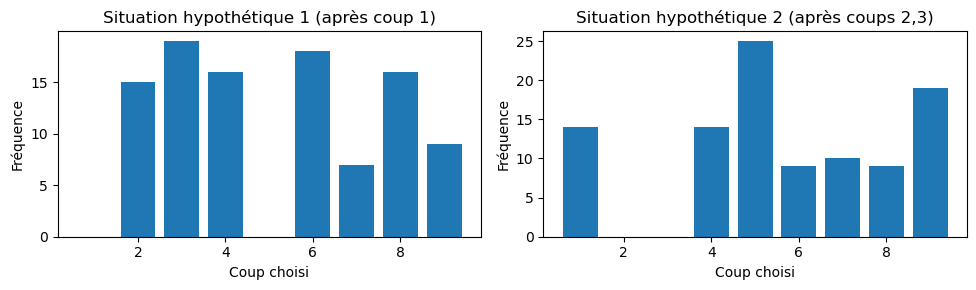

In [24]:
# Création d'un dictionnaire d'états et leurs valeurs associées
# Chaque clé représente un état du jeu sous forme de tuple, et chaque valeur est une estimation de la récompense attendue pour cet état.
etats_et_valeurs = {
    (1): 0.1,          # État après le coup 1 : faible valeur estimée
    (1, 5, 9): 0.02,   # État après les coups 1, 5 puis 9 : faible valeur estimée
    (1, 5, 3): 0.4,    # État après les coups 1, 5 puis 3 : valeur haute estimée
    (2): 0.1,          # État après le coup 2 : faible valeur estimée
    (2, 3, 1): 0.2,    # État après les coups 2, 3, puis 1 : faible valeur estimée
    (2, 3, 5): 0.5,    # État après les coups 2, 3, puis 9 : bonne valeur estimée
}

# Test de la Situation Hypothétique 1
# ----------------------------------
# On simule une situation où le coup 1 a déjà été joué, et on observe quel coup l'agent choisit ensuite.

# État initial : coup 1 déjà joué
etat_actuel_1 = [1, 5]

# Coups encore disponibles sur le plateau
coups_possibles_1 = [2, 3, 4, 6, 7, 8, 9]

# On lance 100 simulations pour voir quels coups sont choisis par l'agent.
# Cela permet de visualiser le compromis exploration/exploitation en action.
coups_choisis_1 = []
for i in range(100):
    coups_choisis_1.append(choisir_coup(coups_possibles_1, etat_actuel_1, etats_et_valeurs, 0.9))

# Test de la Situation Hypothétique 2
# ----------------------------------
# On simule une situation où les coups 2 puis 3 ont déjà été joués, et on observe quel coup l'agent choisit ensuite.

# État initial : coups 2 puis 3 déjà joués
etat_actuel_2 = [2, 3]

# Coups encore disponibles sur le plateau
coups_possibles_2 = [1, 4, 5, 6, 7, 8, 9]

# On lance 100 simulations pour voir quels coups sont choisis par l'agent.
coups_choisis_2 = []
for i in range(100):
    coups_choisis_2.append(choisir_coup(coups_possibles_2, etat_actuel_2, etats_et_valeurs, 0.9))

# Visualisation des résultats avec deux histogrammes
# ------------------------------------------------
# On crée deux histogrammes pour comparer les choix de l'agent dans les deux situations hypothétiques.

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

# Histogramme pour la situation 1
axes[0].hist(coups_choisis_1, bins=range(1, 11), align='left', rwidth=0.8)
axes[0].set_title('Situation hypothétique 1 (après coup 1)')
axes[0].set_xlabel('Coup choisi')
axes[0].set_ylabel('Fréquence')

# Histogramme pour la situation 2
axes[1].hist(coups_choisis_2, bins=range(1, 11), align='left', rwidth=0.8)
axes[1].set_title('Situation hypothétique 2 (après coups 2,3)')
axes[1].set_xlabel('Coup choisi')
axes[1].set_ylabel('Fréquence')

# Ajustement de la disposition pour éviter les chevauchements
plt.tight_layout()

# Affichage des histogrammes
plt.show()